In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [4]:
train = image_dataset_from_directory(train_path,image_size=(256,256),label_mode='categorical')
valid = image_dataset_from_directory(valid_path,image_size=(256,256),label_mode='categorical')

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [5]:

# Count the number of images per class
class_names = train.class_names
class_counts = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names]


In [6]:
# Sort the classes based on the image count
class_counts_sorted = sorted(zip(class_names, class_counts), key=lambda x: x[1], reverse=True)
class_names_sorted, class_counts_sorted = zip(*class_counts_sorted)


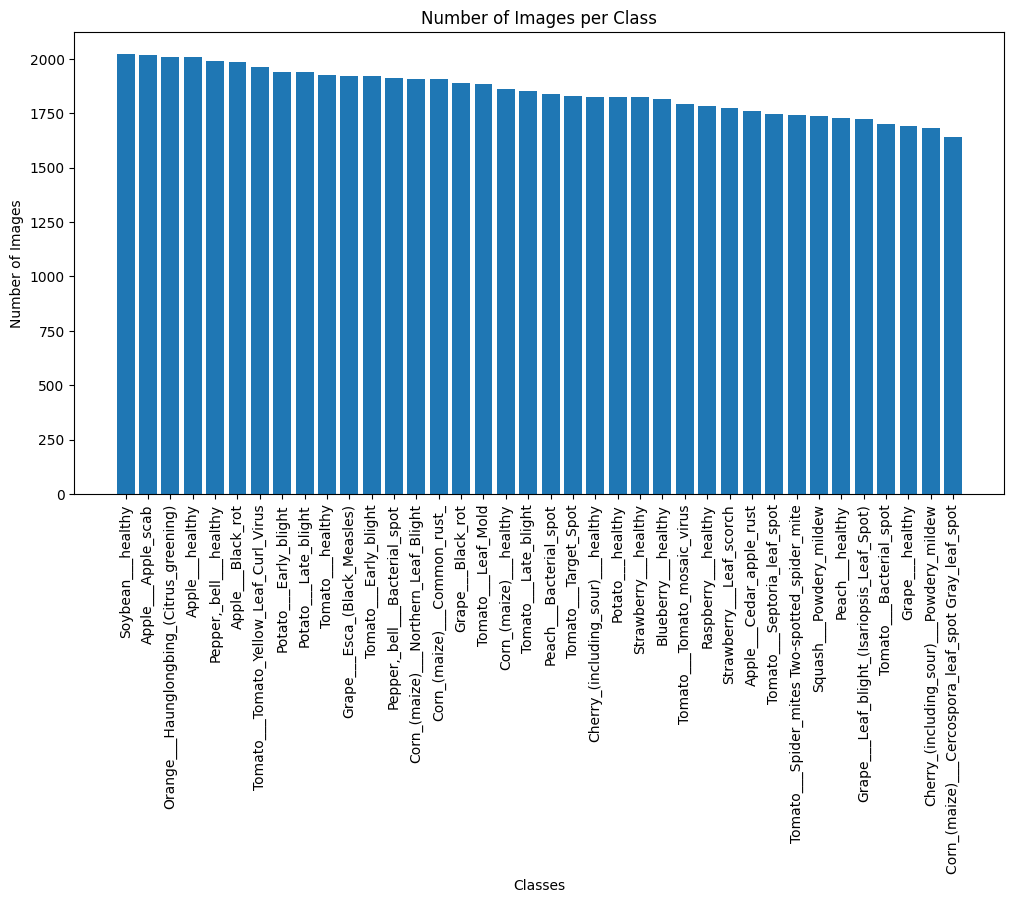

In [7]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_names_sorted, class_counts_sorted)
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.show()


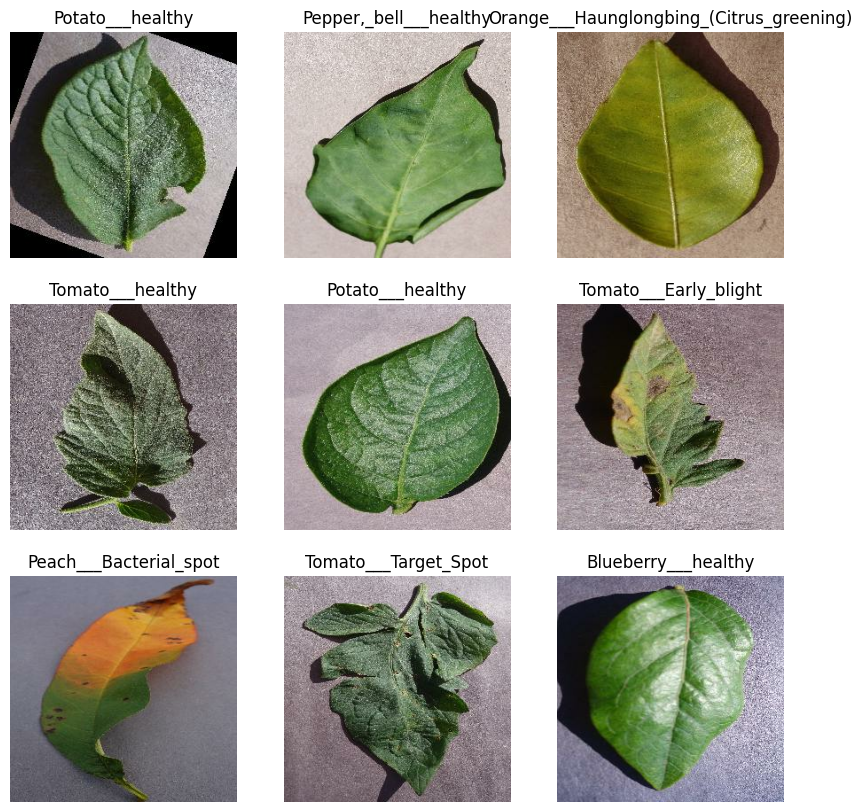

In [8]:
# Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")


In [9]:
model2 = Sequential()

model2.add(Conv2D(32,(2,2),activation="relu",padding="same",input_shape=(256,256,3)))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(2,2),activation="relu",padding="same"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(128,(2,2),activation="relu",padding="same"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(256,(2,2),activation="relu",padding="same"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(512,(2,2),activation="relu",padding="same"))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.30))
model2.add(Dense(38,activation='softmax'))

In [10]:
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
model2.fit(train,epochs=20,validation_data = valid)

Epoch 1/20
2197/2197 [==============================] - 298s 131ms/step - loss: 2.9537 - accuracy: 0.1905 - val_loss: 1.5503 - val_accuracy: 0.5241
Epoch 2/20
2197/2197 [==============================] - 148s 67ms/step - loss: 1.2631 - accuracy: 0.6276 - val_loss: 0.6552 - val_accuracy: 0.8153
Epoch 3/20
2197/2197 [==============================] - 149s 68ms/step - loss: 0.6992 - accuracy: 0.8067 - val_loss: 0.3859 - val_accuracy: 0.8890
Epoch 4/20
2197/2197 [==============================] - 148s 67ms/step - loss: 0.5044 - accuracy: 0.8641 - val_loss: 0.3467 - val_accuracy: 0.9027
Epoch 5/20
2197/2197 [==============================] - 148s 67ms/step - loss: 0.4123 - accuracy: 0.8918 - val_loss: 0.2871 - val_accuracy: 0.9195
Epoch 6/20
2197/2197 [==============================] - 149s 68ms/step - loss: 0.3501 - accuracy: 0.9084 - val_loss: 0.2912 - val_accuracy: 0.9218
Epoch 7/20
2197/2197 [==============================] - 148s 67ms/step - loss: 0.3219 - accuracy: 0.9180 - val_loss: 

In [16]:
ModelLoss, ModelAccuracy = model2.evaluate(valid)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

550/550 [==============================] - 23s 41ms/step - loss: 0.2592 - accuracy: 0.9441
Test Loss is 0.25922587513923645
Test Accuracy is 0.9440587162971497
